In [4]:
from tools.utils import inverse_list, pcut
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import ntpath

# Particionar Modelo

Dado um dataset da tarefa de geofísica, particionamos em treino validação e teste e guardamos a partição em um arquivo json. O arquivo contém.

 * images_folder: caminho relativo ao dataset com as imagens
 * image_names: nomes das imagens na pasta
 * image_classes: classes das imagens, em inteiro
 * id_to_class: mapa das classes inteiras para a classe em caracteres
 * class_to_id: mapa das classes em caracteres para inteiros
 * train: imagens de treino
 * dev: imagens de validação
 * test: imagens de teste
 
Salvamos o arquivo no path abaixo

In [5]:
result_path = 'data/dataset_augmented.json'

### Carregar Dados (Com augmentation)

Carregamos o arquivo com as classificações das imagens e apontamos para a pasta contendo as imagens

In [6]:
# Arquivo com as classificações por imagem
classification = '../datasets/classification/major_3.txt'
# Pasta contendo as imagens
images_folder = '../dataset/train/'
augmented_folder = '../dataset/augmented/'

Mapeamos as imagens para a versão aumentada

In [4]:
for result in os.walk(images_folder):
    files = result[2]
    
for result in os.walk(augmented_folder):
    aug_files = result[2]
    
aug_map = {}
for filename in aug_files:
    basename = ntpath.basename(filename)
    basebase = '_'.join(basename.split('_')[:-2])
    origname = basebase + '.jpg'
    if not origname in aug_map:
        aug_map[origname] = []
    aug_map[origname].append(filename)

Mapeamos as classes em inteiros

In [5]:
id_to_class = ['B','M','R']
class_to_id = utils.inverse_list(id_to_class)

Para cada imagem recuperamos a classificação como inteiros

In [6]:
with open(classification,'r') as f:
    content = f.read()

In [7]:
lines = content.split('\n')
lines = lines[:-1]

In [8]:
lines[0]

'sismoMod_Exp_00000003.jpg B'

In [9]:
with open(classification,'r') as f:
    content = f.read()
    
lines = content.split('\n')
lines = lines[:-1]
image_names = []
image_classes = []
for line in lines:
    name, c = line.split()
    image_names.append(name)
    image_classes.append(class_to_id[c])

Segue a distribuição das classes

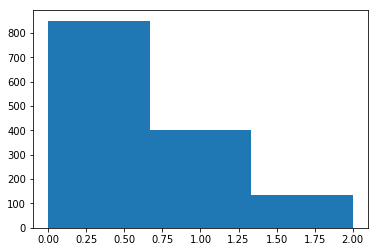

In [10]:
r = plt.hist(image_classes,bins=len(id_to_class))

In [11]:
id_to_freq = r[0]
class_freq = dict(zip(id_to_class, id_to_freq))
print(class_freq)

{'B': 850.0, 'M': 403.0, 'R': 136.0}


### Separação de dados

Separamos os dados em treino, validação e teste. Mantendo as proporções das classes em cada conjunto

Inicialmente separamos os elementos de cada classe

In [12]:
imclasses = np.array(image_classes)

good = np.where(imclasses == 0)[0]
bad = np.where(imclasses == 1)[0]
ugly = np.where(imclasses == 2)[0]

Definimos as proporções de treino, validação e teste

In [13]:
partitions = [0.7, 0.1, 0.2] # train, dev, test end proportions

Criamos a lista de índices de treino validação e teste

In [14]:
good_part = utils.pcut(good, partitions)
bad_part = utils.pcut(bad, partitions)
ugly_part = utils.pcut(ugly, partitions)
c_parts = [good_part, bad_part, ugly_part]

train = np.concatenate([x[0] for x in c_parts])
dev = np.concatenate([x[1] for x in c_parts])
test = np.concatenate([x[2] for x in c_parts])

Guardamos os nomes das imagens das partições de treino, validação e teste num arquivo json

In [15]:
train_names = np.array(image_names)[train]
dev_names = np.array(image_names)[dev]
test_names = np.array(image_names)[test]

save_at = 'data/dataset_augmented.json'

dataset_partition = {
    'train':train.tolist(),
    'dev':dev.tolist(),
    'test':test.tolist(),
    'image_names':image_names,
    'image_classes':image_classes,
    'images_folder':images_folder,
    'augmented_images_folder':augmented_folder,
    'aug_map':aug_map,
    'id_to_class':id_to_class,
    'class_to_id':class_to_id
}

with open(save_at, 'w') as f:
    json.dump(dataset_partition, f)